In [ ]:
#!unzip "/content/drive/MyDrive/ML_SCE/archive.zip" -d "/content/drive/MyDrive/ML_SCE/"

unzip:  cannot find or open /content/drive/MyDrive/ML_SCE/archive.zip, /content/drive/MyDrive/ML_SCE/archive.zip.zip or /content/drive/MyDrive/ML_SCE/archive.zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import shutil
import os
import cv2
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.applications import Xception
from keras.applications.xception import preprocess_input 
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img



['__MACOSX', 'chest_xray', 'test', 'train', 'val']

In [ ]:
os.listdir("/content/drive/MyDrive/ML_SCE/chest_xray")

In [ ]:
len(os.listdir("/content/drive/MyDrive/ML_SCE/chest_xray/train/PNEUMONIA"))

3875

Train set:
PNEUMONIA=3875
NORMAL=1341
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=8
NORMAL=8


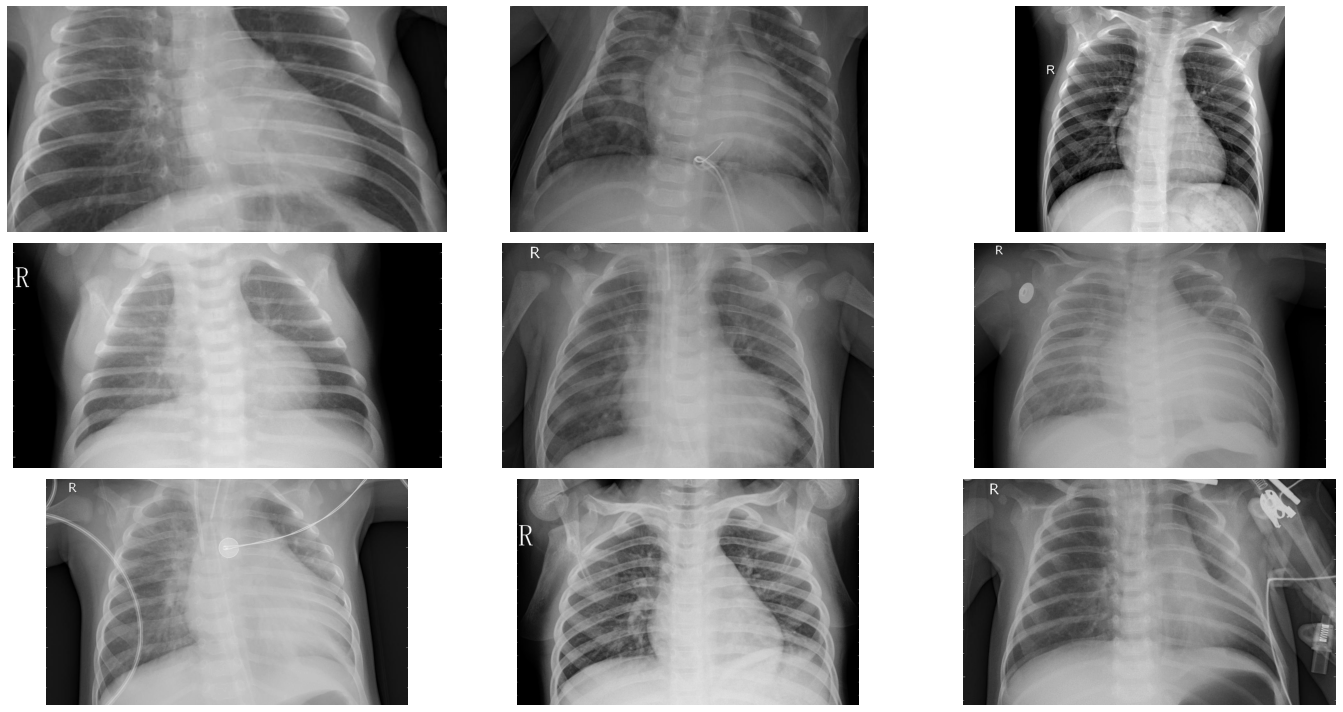

In [ ]:
train_dir = "/content/drive/MyDrive/ML_SCE/chest_xray/train"
test_dir = "/content/drive/MyDrive/ML_SCE/chest_xray/test"
val_dir = "/content/drive/MyDrive/ML_SCE/chest_xray/val"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia = os.listdir("/content/drive/MyDrive/ML_SCE/chest_xray/train/PNEUMONIA")
pneumonia_dir = "/content/drive/MyDrive/ML_SCE/chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

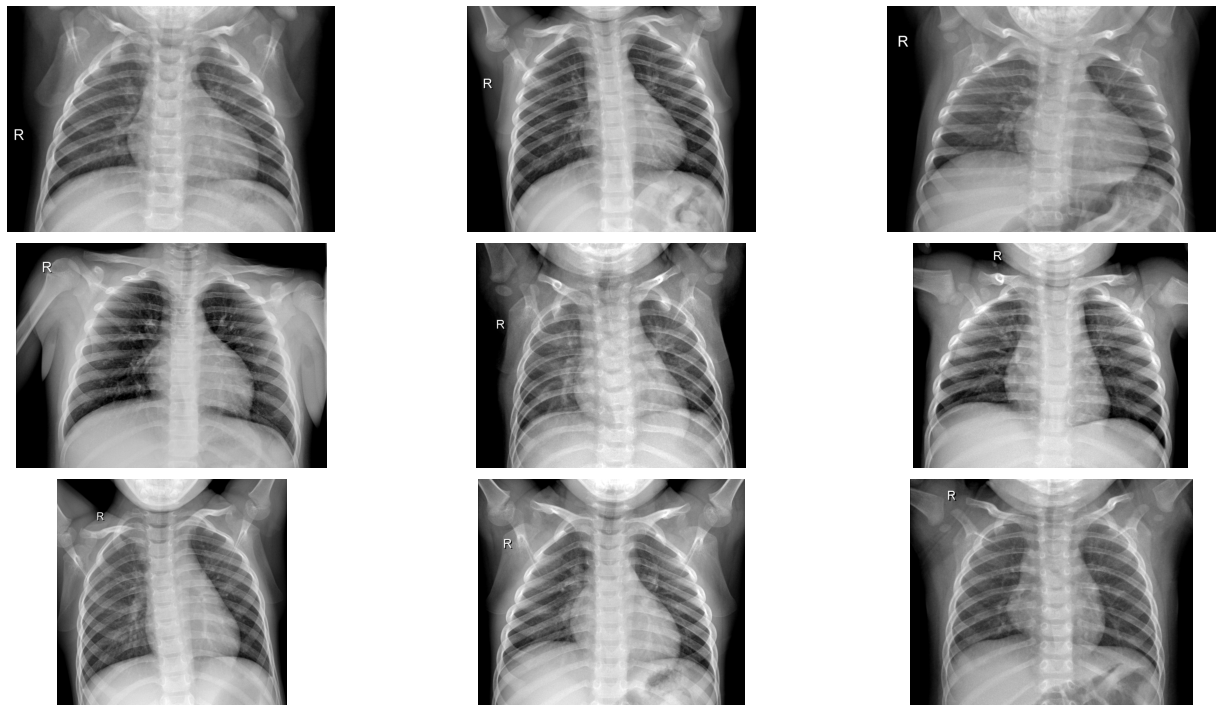

In [ ]:
normal = os.listdir("/content/drive/MyDrive/ML_SCE/chest_xray/train/NORMAL")
normal_dir = "/content/drive/MyDrive/ML_SCE/chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

The dimensions of the image are 970 pixels width and 1410 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 115.5750 and the standard deviation is 64.9213


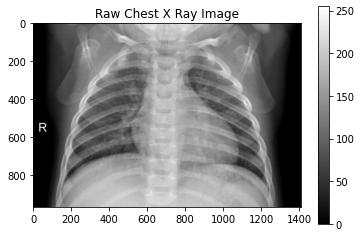

In [ ]:
normal_img = os.listdir("/content/drive/MyDrive/ML_SCE/chest_xray/train/NORMAL")[0]
normal_dir = "/content/drive/MyDrive/ML_SCE/chest_xray/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#Data Augmentation
image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(0.000001), 
              metrics=['accuracy'])

In [ ]:
epochs = 20
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=0)
history = model.fit(train, 
                    epochs=epochs,
                    validation_data=validation,
                    steps_per_epoch=50,
                    callbacks=[es]
                    )

Epoch 1/20
50/50 [==============================] - 32s 629ms/step - loss: 0.9622 - accuracy: 0.5423 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 2/20
50/50 [==============================] - 34s 683ms/step - loss: 0.7128 - accuracy: 0.6998 - val_loss: 0.7058 - val_accuracy: 0.5000
Epoch 00002: early stopping


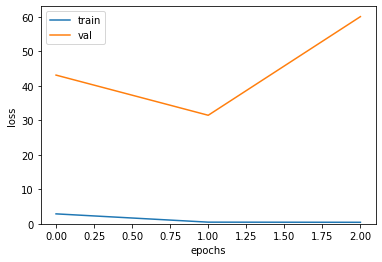

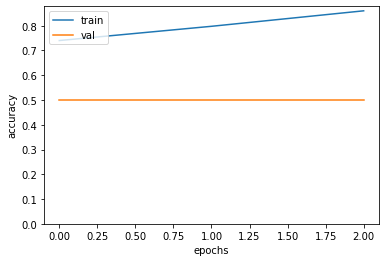

In [ ]:
#Some visualizations
import matplotlib.pyplot as plt
#Loss
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
# Set the y axis label of the current axis.
plt.ylabel('loss')
plt.ylim(ymin=0) 
# Set a title 
# Display the figure.
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Accuracy
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.xlabel('epochs')
# Set the y axis label of the current axis.
plt.ylabel('accuracy')
plt.ylim(ymin=0) 
# Set a title 
#plt.title('Draw a line.')
# Display the figure.
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
IMAGE_SIZE=180
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

base_model.trainable = False
model = tf.keras.Sequential([
                             base_model,
                             tf.keras.layers.Conv2D(64, 3, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Conv2D(32, 3, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 3, 3, 64)          294976    
_________________________________________________________________
dropout_14 (Dropout)         (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 1, 1, 32)          18464     
_________________________________________________________________
dropout_15 (Dropout)         (None, 1, 1, 32)          0         
_________________________________________________________________
global_average_pooling2d_4 ( (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)               

In [ ]:
epochs = 20
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
history = model.fit(train, 
                    epochs=epochs,
                    validation_data=validation,
                    steps_per_epoch=5213//32,
                    callbacks=[es]
                    )

Epoch 1/20
162/162 [==============================] - 26s 155ms/step - loss: 0.4633 - accuracy: 0.7821 - val_loss: 0.3814 - val_accuracy: 0.8125
Epoch 2/20
162/162 [==============================] - 25s 151ms/step - loss: 0.1995 - accuracy: 0.9267 - val_loss: 0.6328 - val_accuracy: 0.7500
Epoch 3/20
162/162 [==============================] - 24s 151ms/step - loss: 0.1643 - accuracy: 0.9457 - val_loss: 0.5749 - val_accuracy: 0.7500
Epoch 4/20
162/162 [==============================] - 25s 156ms/step - loss: 0.1700 - accuracy: 0.9246 - val_loss: 0.8303 - val_accuracy: 0.6250
Epoch 5/20
162/162 [==============================] - 25s 152ms/step - loss: 0.1069 - accuracy: 0.9627 - val_loss: 0.4917 - val_accuracy: 0.6875
Epoch 6/20
162/162 [==============================] - 25s 152ms/step - loss: 0.1065 - accuracy: 0.9727 - val_loss: 0.5105 - val_accuracy: 0.7500
Epoch 7/20
162/162 [==============================] - 25s 152ms/step - loss: 0.1062 - accuracy: 0.9529 - val_loss: 0.3808 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

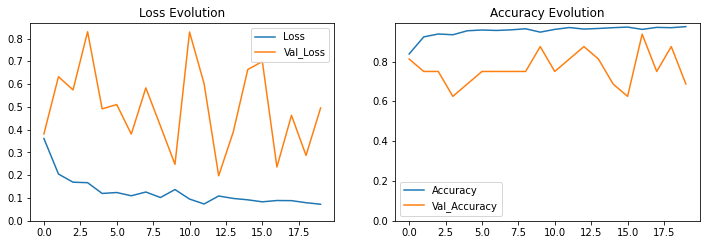

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.ylim(ymin=0) 
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.ylim(ymin=0) 
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")


624/624 [==============================] - 186s 298ms/step - loss: 0.6720 - accuracy: 0.8093
Test Accuracy: 80.93%
652/652 [==============================] - 96s 147ms/step - loss: 0.0599 - accuracy: 0.9764
Train Accuracy: 97.64%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.983193,0.768317,0.809295,0.875755,0.848895
recall,0.500000,0.994872,0.809295,0.747436,0.809295
f1-score,0.662890,0.867039,0.809295,0.764964,0.790483
support,234.000000,390.000000,0.809295,624.000000,624.000000


In [ ]:
print(confusion_matrix(test.classes, pred > 0.5))

[[129 105]
 [  3 387]]


In [ ]:
print(classification_report(test.classes, pred > 0.5))

              precision    recall  f1-score   support

           0       0.98      0.50      0.66       234
           1       0.77      0.99      0.87       390

    accuracy                           0.81       624
   macro avg       0.88      0.75      0.76       624
weighted avg       0.85      0.81      0.79       624



In [ ]:
model.save("/content/drive/MyDrive/ML_SCE/pvgg1.h5")

In [ ]:
from keras.models import load_model

import cv2

import numpy as np

model = load_model('/content/drive/MyDrive/ML_SCE/pvgg.h5')
img = cv2.imread('/content/drive/MyDrive/ML_SCE/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
img = cv2.resize(img,(180,180))
img = np.reshape(img,[1,180,180,3])
classes = model.predict_classes(img)
#print(classes)
preds = model.predict_classes(img)
if(preds == [[1]]):
  pred = 'PNEUMONIA'
else:
  pred = 'NORMAL'
#print("Predicted Label name:", pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print("Model outut:", classes)
print("Predicted Label name:", pred)

Model outut: [[0]]
Predicted Label name: NORMAL
